In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

STRATEGIES = ['allgather_A_col', 'allgather_A_col_no_compute',
              'allgather_A_row', 'allgather_A_row_no_compute',
              'allgather_B_col', 'allgather_B_col_no_compute',
              'allgather_B_row', 'allgather_B_row_no_compute',
              'reducescatter_C_col', 'reducescatter_C_col_no_compute',
              'reducescatter_C_row', 'reducescatter_C_row_no_compute',
              'algorithm1', 'algorithm1_no_compute',
              'algorithm2', 'algorithm2_no_compute'] # removed throughput_test for now

In [11]:
FILENAME = "../initial-benchmarks/nocheck-n8-benchmark.csv"
df = pd.read_csv(FILENAME, names=["strategy", "size", "m", "n", "k", "throughput", "time", "memory"])

In [12]:
grouped = df.groupby('strategy')

# input the strategy name to get the df with that strategy
strategy_dict = {}

for strategy, group_df in grouped:
    strategy_dict[strategy] = group_df

In [14]:
strategy_dict["reducescatter_C_col"]

,strategy,size,m,n,k,throughput,time,memory
5184,reducescatter_C_col,8,1200,1200,1200,210.957383,0.016382,0.005365
5185,reducescatter_C_col,8,1200,1200,1200,209.454594,0.016500,0.005365
5186,reducescatter_C_col,8,1200,1200,1200,207.976048,0.016617,0.005365
5187,reducescatter_C_col,8,1200,2400,1200,221.667680,0.031182,0.009388
5188,reducescatter_C_col,8,1200,2400,1200,218.350337,0.031656,0.009388
...,...,...,...,...,...,...,...,...
5827,reducescatter_C_col,8,18000,12000,18000,525.823545,14.788231,0.905246
5828,reducescatter_C_col,8,18000,12000,18000,524.189630,14.834326,0.905246
5829,reducescatter_C_col,8,18000,18000,18000,540.165963,21.593364,1.206995
5830,reducescatter_C_col,8,18000,18000,18000,539.137110,21.634571,1.206995


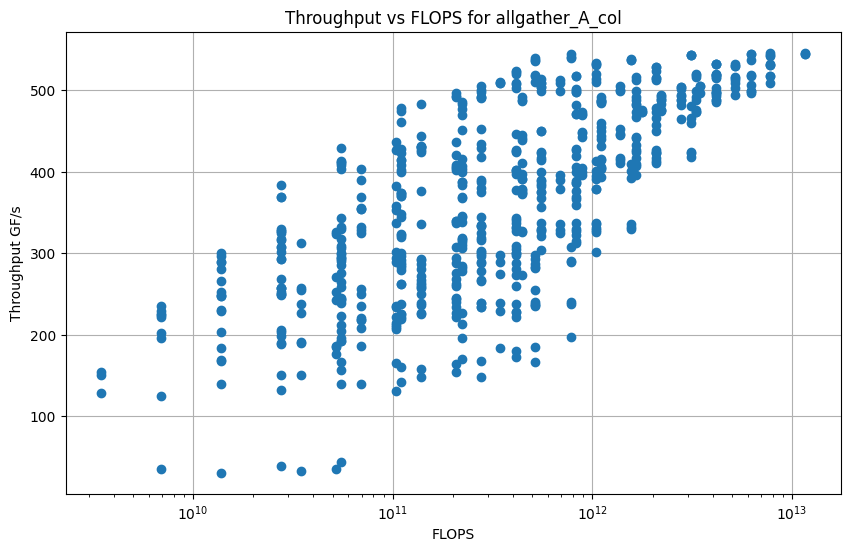

In [28]:
current_strategy = "allgather_A_col"
curr_df = strategy_dict[current_strategy]


# Calculate FLOPS
flops = 2 * curr_df['m'] * curr_df['n'] * curr_df['k']
flops
# Plot throughput/FLOPS graph
plt.figure(figsize=(10, 6))
plt.plot(flops, curr_df['throughput'], marker='o', linestyle='')
plt.xscale('log')
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title(f"Throughput vs FLOPS for {current_strategy}")
plt.grid(True)
plt.show()

# this basically shows us how the max throughput we can get of a node with x number of cores
# it also shows how increasing the problem size allows for more effective cpu use

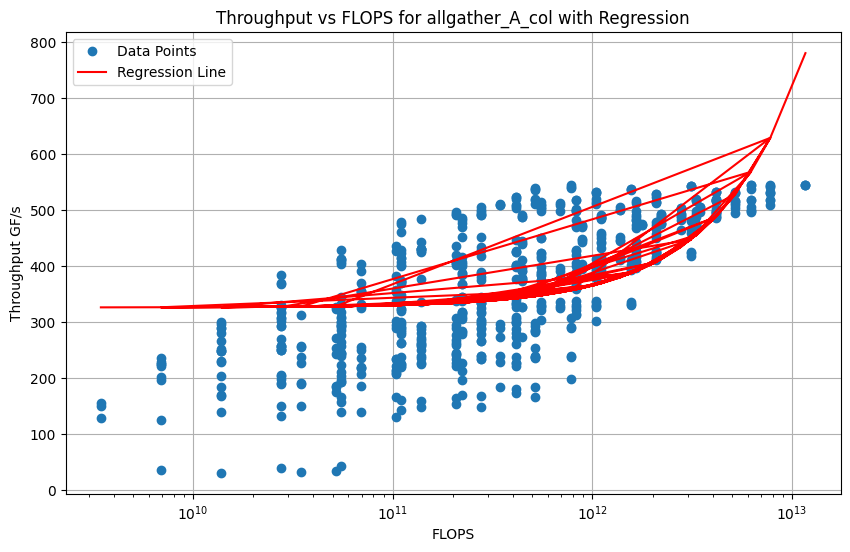

Slope: 3.8931612187790745e-11
Intercept: 326.261129420907
R-squared: 0.3143769899965576
P-value: 6.3395717256503126e-55
Standard Error: 2.262056488548519e-12


In [32]:
current_strategy = "allgather_A_col"
curr_df = strategy_dict[current_strategy]

# Calculate FLOPS
flops = 2 * curr_df['m'] * curr_df['n'] * curr_df['k']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(flops, curr_df['throughput'])

# Plot throughput/FLOPS graph with regression line
plt.figure(figsize=(10, 6))
plt.plot(flops, curr_df['throughput'], marker='o', linestyle='', label='Data Points')
plt.plot(flops, intercept + slope * flops, linestyle='-', color='red', label='Regression Line')
plt.xscale('log')
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title(f"Throughput vs FLOPS for {current_strategy} with Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# the regression is pretty useless

KeyError: 'algorithm1'

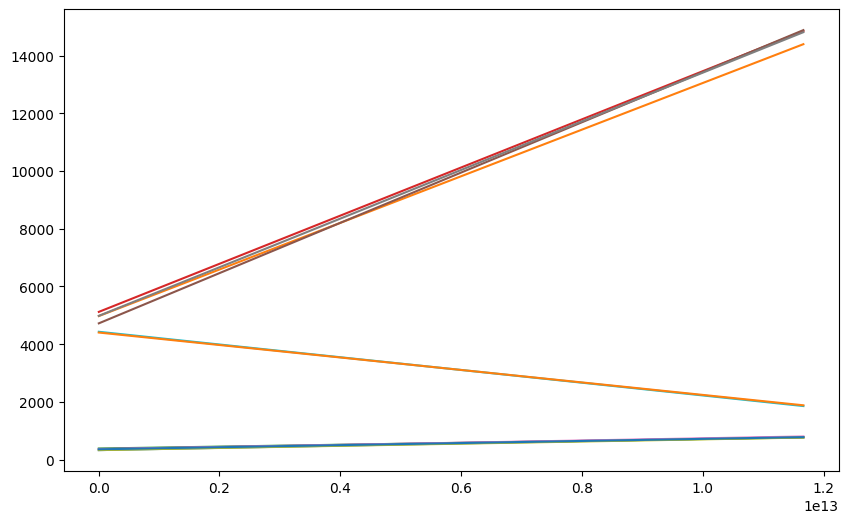

In [33]:
plt.figure(figsize=(10, 6))

# Iterate over each strategy
for strategy in STRATEGIES:
    # Select DataFrame for the current strategy
    curr_df = strategy_dict[strategy]
    
    # Calculate FLOPS
    flops = 2 * curr_df['m'] * curr_df['n'] * curr_df['k']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(flops, curr_df['throughput'])
    
    # Plot data points
    # plt.scatter(flops, curr_df['throughput'], label=strategy)
    
    # Plot regression line
    plt.plot(flops, intercept + slope * flops, linestyle='-', label=f'Regression Line: {strategy}')
    
# Add labels and title
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title('Throughput vs FLOPS with Regression Lines for All Strategies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()